In [18]:
import numpy as np
import scipy
import os
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [19]:
def label(filename):
  if 'virus' in filename  or 'bacteria' in filename:
    return 1
  else:
    return 0

In [20]:
def image2vector(path, filename, num_px = 128):
  filename = path + filename
  new_image = Image.open(filename).convert('RGB').resize((num_px,num_px))
  new_image = np.array(new_image)
  #new_image = np.array(new_image.getdata()).reshape(new_image.size[0] * new_image.size[1] * 3, 1) / 255
  return new_image

tamaño original (1696, 1224)


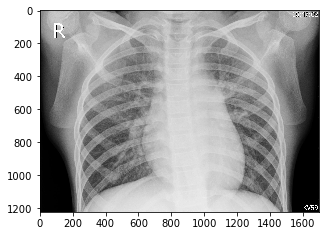

In [21]:
filename = 'D:/Documentos/deep_learning/trabajos/Neumonia/dataset/person1596_bacteria_4184.jpeg'
img = Image.open(filename).convert('RGB')
print('tamaño original ' + str(img.size))
plt.imshow(img)

reshape a (128, 128)
dimension flatten:(128, 128, 3)


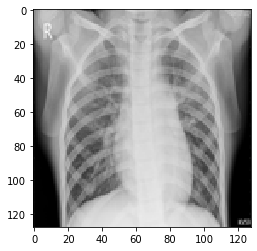

In [22]:
test_dir = 'D:/Documentos/deep_learning/trabajos/Neumonia/dataset/'
test_filename = 'person1596_bacteria_4184.jpeg'

filename = test_dir + test_filename
num_px=128
new_image = Image.open(filename).convert('LA').resize((num_px,num_px))
print('reshape a ' + str(new_image.size))
plt.imshow(new_image)


vector_img = image2vector(test_dir, test_filename, num_px)
print('dimension flatten:' + str(vector_img.shape))

In [23]:
def dataset():
  path = 'D:/Documentos/deep_learning/trabajos/Neumonia/dataset/'
  X = []
  Y = []
  
  for entry in os.scandir(path):
    if entry.is_file():
       X.append(image2vector(path, entry.name))
       Y.append([label(entry.name)])

  X = np.array(X)
  Y = np.array(Y)
  
  return X, Y

In [24]:
X, Y = dataset()

count0 = 0
count1 = 0

for y in Y:
  if y[0] == 0:
    count0 += 1
  else:
    count1 +=1

print('total muestras: ' + str(len(X)))
print('shape X: ' + str(X.shape))
print('shape primera muestra: ' + str(X[0].shape))
print(' ')
print('total etiquetas: ' + str(len(Y)))
print('etiquetas 0: ' + str(count0))    
print('etiquetas 1: ' + str(count1))    
print('shape Y: ' + str(Y.shape))

total muestras: 5216
shape X: (5216, 128, 128, 3)
shape primera muestra: (128, 128, 3)
 
total etiquetas: 5216
etiquetas 0: 1341
etiquetas 1: 3875
shape Y: (5216, 1)
